In [16]:
%load_ext autoreload
%autoreload 2
!pwd
import os
import sys 
if os.path.abspath("../../../") not in sys.path:
    sys.path.append(os.path.abspath("../../../")) 

import os
import networkx as nx
from rwtools.nemesis.graph.nemesis_node import AbstractNemesisNode
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg
from rwtools.nemesis.control_flow_graph import ControlFlowGraph


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/home/gilles/git-repos/NemesisRetroWrite/retrowrite/rwtools/nemesis/samples_notebooks


In [18]:
import sys 
sys.executable

'/home/gilles/git-repos/NemesisRetroWrite/retrowrite/venv/bin/python'

In [19]:
from test_main import setup 

binary = os.path.abspath("./simple_loop/simple_loop")
outputfile = "./simple_loop/simple_loop.s"
loader, rw = setup(binary, outputfile)
rw.dump()

[*] Relocations for a section that's not loaded: .rela.dyn
[x] Could not replace value in .init_array
[x] Couldn't find valid section 3df8
[x] Couldn't find valid section 3fd8
[x] Couldn't find valid section 3fe0
[x] Couldn't find valid section 3fe8
[x] Couldn't find valid section 3ff0
[x] Couldn't find valid section 3ff8


In [20]:
with open(outputfile, "r") as f: 
    content = f.read() 
    print(content)

.section .rodata
.align 4
.type	_IO_stdin_used_2000,@object
.globl _IO_stdin_used_2000
_IO_stdin_used_2000: # 2000 -- 2004
.LC2000:
	.byte 0x1
.LC2001:
	.byte 0x0
.LC2002:
	.byte 0x2
.LC2003:
	.byte 0x0

.section .data
.align 8
.LC4000:
	.byte 0x0
.LC4001:
	.byte 0x0
.LC4002:
	.byte 0x0
.LC4003:
	.byte 0x0
.LC4004:
	.byte 0x0
.LC4005:
	.byte 0x0
.LC4006:
	.byte 0x0
.LC4007:
	.byte 0x0
.LC4008:
	.quad .LC4008
.section .bss
.align 1
.type	completed.8060_4010,@object
.globl completed.8060_4010
completed.8060_4010: # 4010 -- 4011
.LC4010:
	.byte 0x0
.LC4011:
	.byte 0x0
.LC4012:
	.byte 0x0
.LC4013:
	.byte 0x0
.LC4014:
	.byte 0x0
.LC4015:
	.byte 0x0
.LC4016:
	.byte 0x0
.LC4017:
	.byte 0x0
.section .text
.align 16
	.text
.globl main
.type main, @function
main:
.L1129:
.LC1129:
	endbr64 
.LC112d:
	pushq %rbp
.LC112e:
	movq %rsp, %rbp
.LC1131:
	movl $1, -8(%rbp)
.LC1138:
	movl $0, -4(%rbp)
.LC113f:
	jmp .L1149
.L1141:
.LC1141:
	addl $1, -8(%rbp)
.LC1145:
	addl $1, -4(%rbp)
.L1149:
.LC1149:
	cmp

[*] Relocations for a section that's not loaded: .rela.dyn
[x] Could not replace value in .init_array
[x] Couldn't find valid section 3df8
[x] Couldn't find valid section 3fd8
[x] Couldn't find valid section 3fe0
[x] Couldn't find valid section 3fe8
[x] Couldn't find valid section 3ff0
[x] Couldn't find valid section 3ff8


ValueError: ctypes objects containing pointers cannot be pickled

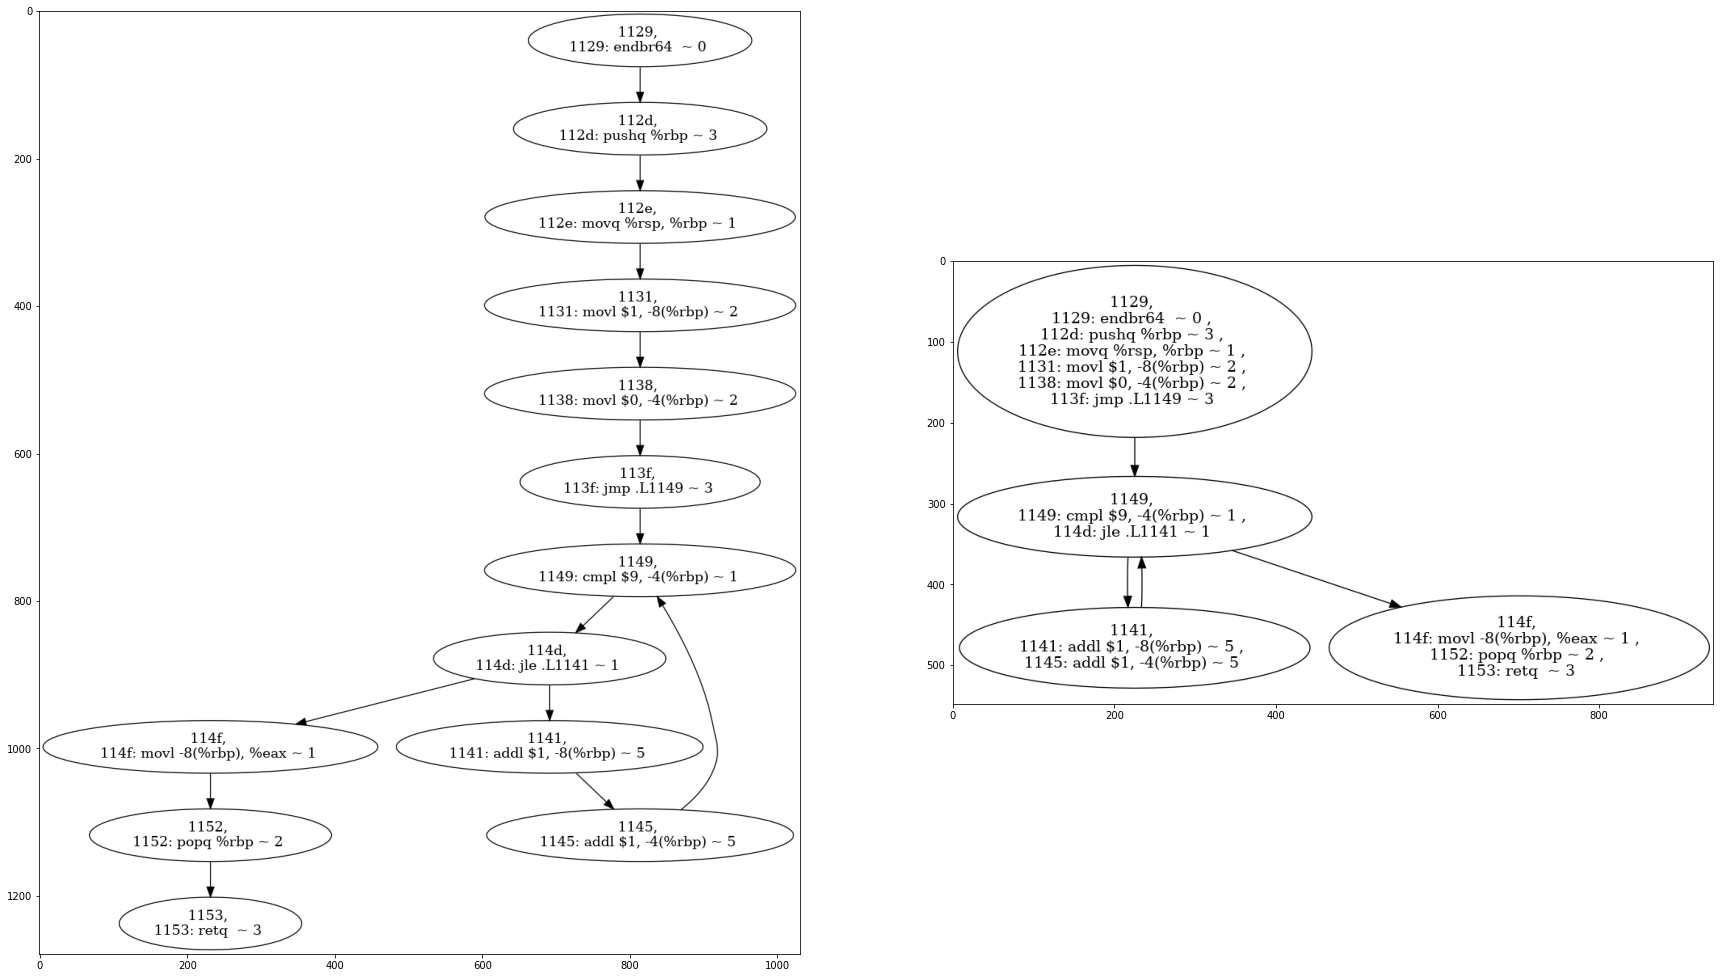

In [47]:
%autoreload 2 
from rwtools.nemesis.graph.utils import create_graph_structure, to_img
from rwtools.nemesis.graph.utils import unwind_graph

loader, rw = setup(binary, outputfile)

# list of all function names -- for each function seperately make a graph and balance it
function_names = loader.container.function_names

nodes, graph = create_graph_structure(loader.container, "main")
fig, axs = plt.subplots(1, 2, figsize=(30, 30))
# axs = [axs]
axs[0].imshow(to_img(graph))
                    
control_flow_graph = ControlFlowGraph(nodes=nodes, graph=graph)
control_flow_graph.merge_consecutive_nodes()

axs[1].imshow(to_img(graph))

unwind_graph(graph)
# control_flow_graph.balance_branching_node('1130')

# axs[2].imshow(to_img(graph))

In [46]:
import copy 

type(list(graph.nodes)[0])
# node = copy.deepcopy(list(graph.nodes)[0])

test_node = list(graph.nodes)[0]

copy.copy(test_node.latencies)
# copy.deepcopy(test_node.id)
copy.copy(test_node.instruction_wrappers)